
<div align="center"> <h1> TP segmentation </h1> </div>

In [3]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# 1) Appliquer K-means

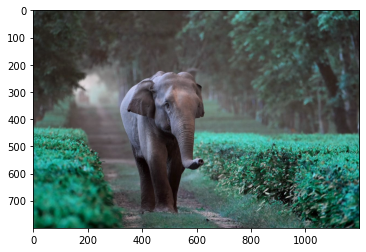

In [13]:
original = cv2.imread('image.jpg')
image = cv2.imread('image.jpg')
(h1, w1) = image.shape[:2]

#resize l'image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

#appliquer 2, 3 et 5  cluster sur l'image
clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)


plt.imshow(image)



> ### <font color=red> cette image est le resultat d'une normalisation (reshape) </font>

à chaque fois je vais modifier le nomres de claster et visualiser l'image 

## Resultat avec 2 cluster :

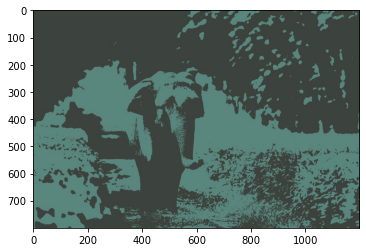

In [10]:
cv2.imwrite('image2.jpg', quant)
image2 = cv2.imread('image2.jpg')
plt.imshow(image2)

cv2.imread('image.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

## Resultat avec 3 cluster :

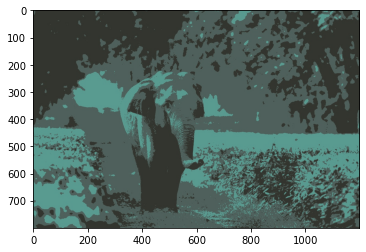

In [12]:
#enregistrer le resultat dans image3.jpg
cv2.imwrite('image3.jpg', quant)
#afficher image avec 3 clusters
image3 = cv2.imread('image3.jpg')
plt.imshow(image3)

cv2.imread('image.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

## Resultat avec 5 cluster

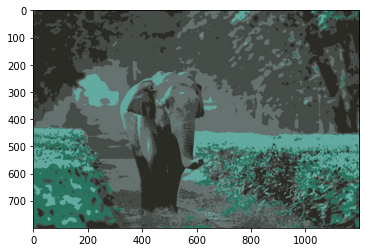

In [14]:

#enregistrer le resultat dans image5.jpg
cv2.imwrite('image5.jpg', quant)
#afficher image avec 5 clusters
image5 = cv2.imread('image5.jpg')
plt.imshow(image5)

cv2.imread('image.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

## remarque 

> ### <font color=red> il est claire qu'il y a une difference entre les 3 images  </font>

# 2) appliquer les bruits 

### <font color=blue> 1 ere methonde : </font>

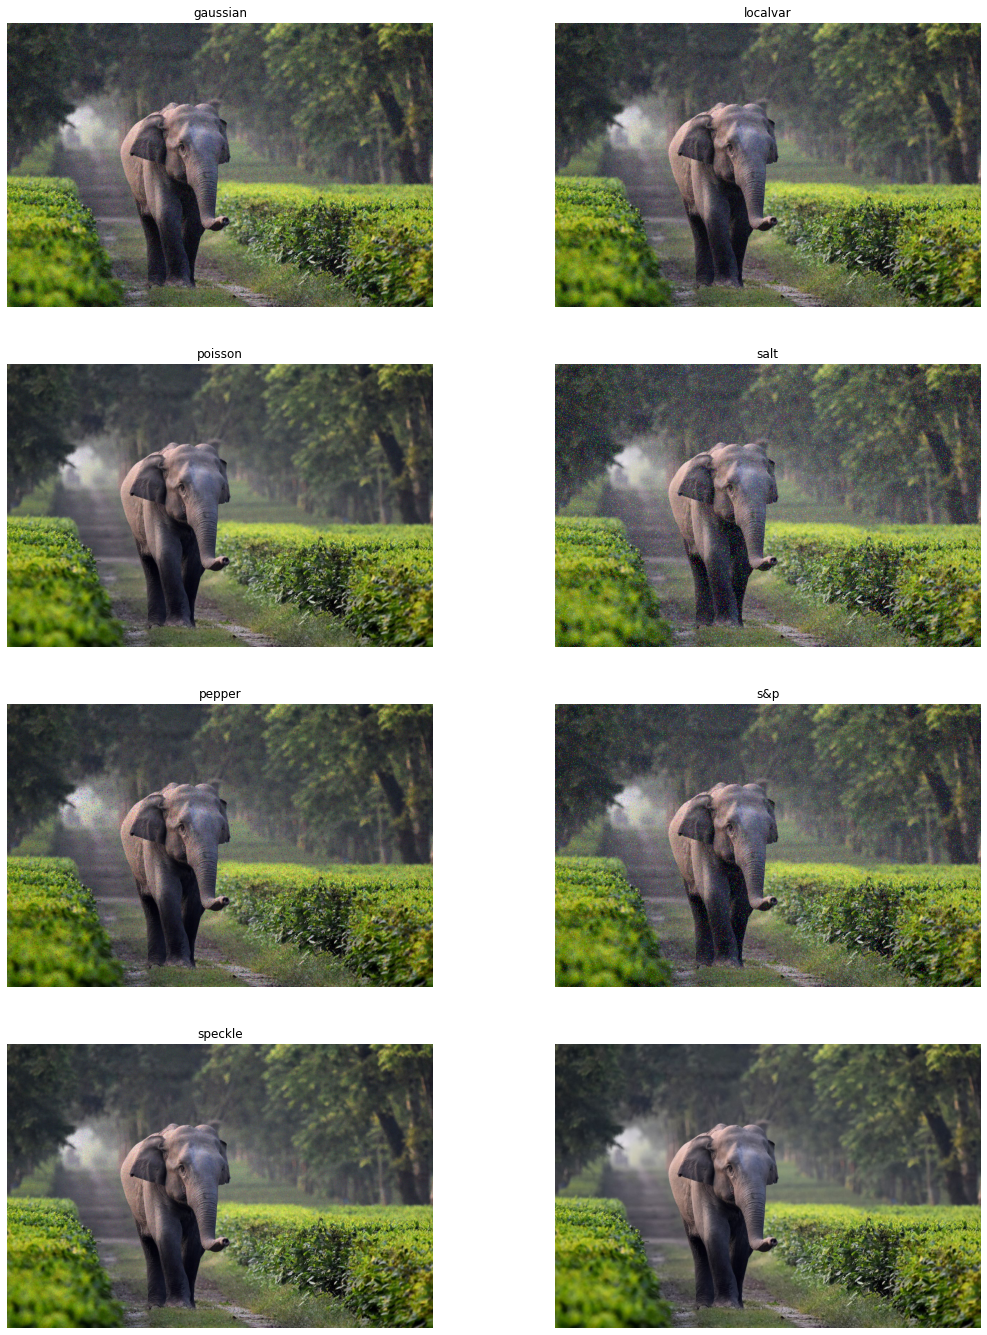

In [83]:
import skimage.io
import matplotlib.pyplot as plt
img_path="image.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        plt.imsave("imagnoise.jpg",gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



## remarque 

> ### <font color=red>le 6 eme bruit est le plus fort  donc je vais travailler sur elle  </font>

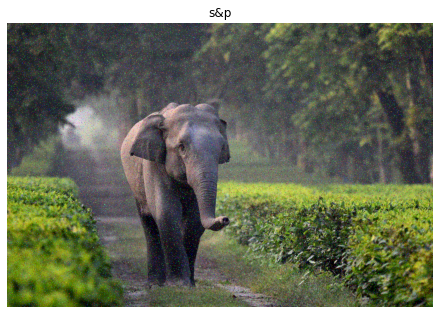

In [39]:
plt.figure(figsize=(18,24))
imageNoise = plotnoise(img, "s&p", r,c,4)

> ### <font color=red> cette image est le resultat de bruit 6  </font>

## enregistrer l'image bruitée dans noise1.jpg :  

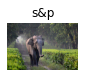

In [18]:
fig = plt.figure()
plotnoise(img, "s&p", r,c,4)
fig.savefig('noise1.jpg')


### <font color=blue> 2 eme  methonde : </font>

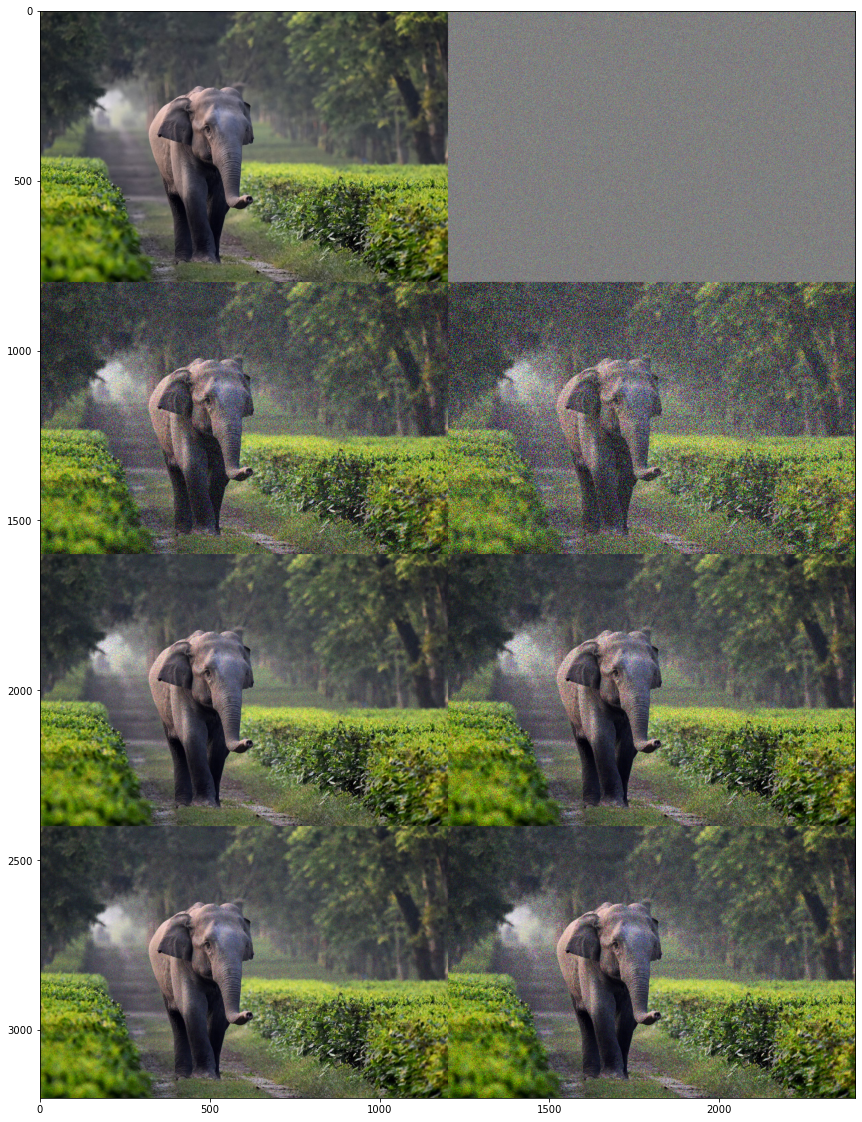

(0.0, 1.0, 0.0, 1.0)

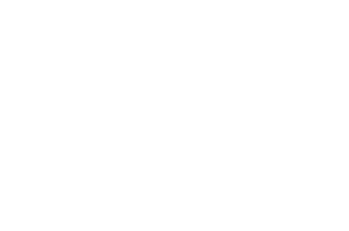

In [44]:

img =cv2.imread('image.jpg')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.axis("off")

## enregistrer l'image bruité dans noise2.jpg :  

(-0.5, 1199.5, 799.5, -0.5)

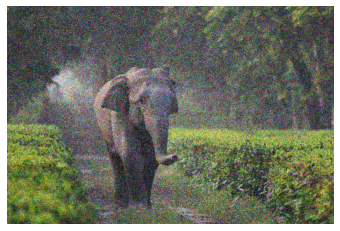

In [57]:
fig = plt.figure()
plt.imshow(noisy2) 
fig.savefig('noise2.jpg')
plt.axis("off")

## On va appliquer le k-means sur la photo bruitée:

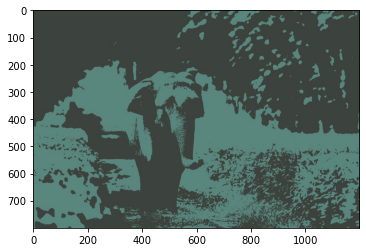

In [66]:
image = cv2.imread('noise2.jpg')
(h1, w1) = image.shape[:2]

#resize l'image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

#appliquer 2, 3 et 5  cluster sur l'image
clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)


plt.imshow(image)

cv2.imwrite('noise2kmeans.jpg', quant)
image2 = cv2.imread('image2.jpg')
plt.imshow(image2)

cv2.imread('noise2.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()


## remarque 

> ### <font color=red> k-means n'a pas le meme effet sur une image claire et une image bruitée  </font>

# 2) appliquer le filtre

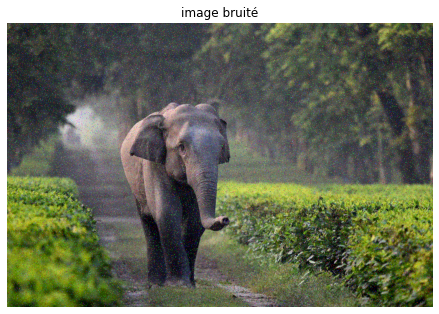

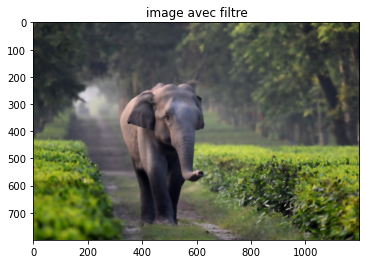

In [99]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt

img_path="image.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
#applquer le bruit 
plotnoise(img, "s&p", r,c,3)
plt.title("image bruité")
plt.show()
#appliquer le filre
denoised_image = denoise_tv_chambolle(img,weight=0.1,
multichannel=True)
plt.title("image avec filtre")
plt.imshow(denoised_image)

## remarque 

> ### <font color=red>  on remarque que le débruit ne rendu pas l'image à son état initile  </font>